In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 4 * 4, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
net.load_state_dict(torch.load("LeNET_300_100_MNIST_Model"))

In [3]:
from torchsummary import summary
device=torch.device("cpu")
model=Net().to(device)
summary(model, input_size=(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 300]          77,100
            Linear-6                  [-1, 100]          30,100
            Linear-7                   [-1, 10]           1,010
Total params: 110,782
Trainable params: 110,782
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.42
Estimated Total Size (MB): 0.47
----------------------------------------------------------------


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

In [5]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 98.110000 %


In [6]:
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())
    print(param_tensor, "\t", net.state_dict()[param_tensor])

conv1.weight 	 torch.Size([6, 1, 5, 5])
conv1.weight 	 tensor([[[[-0.0192,  0.2511,  0.2183,  0.0210,  0.0190],
          [-0.0522,  0.3645,  0.3561,  0.5513,  0.3440],
          [ 0.0598,  0.5070,  0.6116,  0.6220,  0.2953],
          [ 0.2985,  0.1301,  0.4567,  0.1638,  0.2149],
          [-0.0246,  0.3206,  0.1249,  0.1288, -0.1632]]],


        [[[-0.1775, -0.0977,  0.0400,  0.2623,  0.2931],
          [ 0.0318, -0.1988, -0.1956,  0.1583,  0.1678],
          [-0.2439, -0.2983, -0.0792,  0.2235,  0.3461],
          [-0.0280, -0.2769, -0.1121,  0.0926,  0.3560],
          [-0.1970, -0.1645,  0.1938,  0.2115,  0.1824]]],


        [[[ 0.1362,  0.2118, -0.2154, -0.2076, -0.2334],
          [ 0.2467, -0.0821, -0.1670, -0.0738,  0.2066],
          [ 0.2564,  0.1952,  0.2048,  0.3864,  0.0963],
          [ 0.0786,  0.3546,  0.3418, -0.0168,  0.1037],
          [ 0.0178, -0.2039, -0.1759, -0.0146, -0.0048]]],


        [[[ 0.0299,  0.1694, -0.0029, -0.1827, -0.0718],
          [-0.1909, -

In [7]:
i=0
for parameter in net.parameters():
    i+=1
    print(i," ",parameter.shape,"\n ",parameter,"\n\n")

1   torch.Size([6, 1, 5, 5]) 
  Parameter containing:
tensor([[[[-0.0192,  0.2511,  0.2183,  0.0210,  0.0190],
          [-0.0522,  0.3645,  0.3561,  0.5513,  0.3440],
          [ 0.0598,  0.5070,  0.6116,  0.6220,  0.2953],
          [ 0.2985,  0.1301,  0.4567,  0.1638,  0.2149],
          [-0.0246,  0.3206,  0.1249,  0.1288, -0.1632]]],


        [[[-0.1775, -0.0977,  0.0400,  0.2623,  0.2931],
          [ 0.0318, -0.1988, -0.1956,  0.1583,  0.1678],
          [-0.2439, -0.2983, -0.0792,  0.2235,  0.3461],
          [-0.0280, -0.2769, -0.1121,  0.0926,  0.3560],
          [-0.1970, -0.1645,  0.1938,  0.2115,  0.1824]]],


        [[[ 0.1362,  0.2118, -0.2154, -0.2076, -0.2334],
          [ 0.2467, -0.0821, -0.1670, -0.0738,  0.2066],
          [ 0.2564,  0.1952,  0.2048,  0.3864,  0.0963],
          [ 0.0786,  0.3546,  0.3418, -0.0168,  0.1037],
          [ 0.0178, -0.2039, -0.1759, -0.0146, -0.0048]]],


        [[[ 0.0299,  0.1694, -0.0029, -0.1827, -0.0718],
          [-0.1909, -0

###### First we have to convert the nodes to points in some d dimenstion. Where d is the number of nodes in the next layer.

In [8]:
(net.state_dict()["fc1.weight"]).shape

torch.Size([300, 256])

We can not prune the layer with 256 nodes. We have to prune the layer with 300 nodes. So, that depends on the outgoing edges weights means fc2. Because, if we consider the incoming edges two nodes with similar kind of incoming weights might not have a similar kind of effect on the next layer. But, two nodes having similar kind of outgoing edges will have same effect on the next layer. Example: if node1 has incoming edge i1, and outgoing edge o1. And node2 have incoming edge form same previous incoming node as i2, and same outgoing edge weight as o2. Then if we club them up, the net effect will be some function of f(i1+i2)* o1. assuming o1 and o2 are very similar.

In [9]:
print((net.state_dict()["fc2.weight"]).shape)
print(type(net.state_dict()["fc2.weight"]))

torch.Size([100, 300])
<class 'torch.Tensor'>


After changing the dimension of the layer with 300 nodes, to somehting less than 300. We also have to assing the incoming weight edges accordingly, and assign the outgoing edges equals to be mostly the avg of the nodes in same cluster.

So, first we need to form a space of dimension 100, with 300 points depending on fc2 weights. 

In [10]:
mat=net.state_dict()["fc2.weight"].t()
print(mat)
print(mat.shape)

tensor([[ 0.0402,  0.0027,  0.0155,  ...,  0.0570, -0.0099, -0.0361],
        [-0.0434,  0.0438, -0.0348,  ..., -0.0697,  0.0150,  0.0464],
        [ 0.0285, -0.0360,  0.0268,  ...,  0.0352,  0.0478, -0.0538],
        ...,
        [-0.0308,  0.0140,  0.0200,  ..., -0.0380,  0.0631,  0.0255],
        [-0.0236,  0.0560,  0.0367,  ..., -0.0513, -0.0225, -0.0425],
        [ 0.0146,  0.0263,  0.0531,  ..., -0.0107,  0.0330, -0.0736]])
torch.Size([300, 100])


In [11]:
from collections import defaultdict
nodes=defaultdict(list)
for j in range(len(net.state_dict()["fc2.weight"][0])):
    ele=[]
    for i in range(len(net.state_dict()["fc2.weight"])):
        ele.append(net.state_dict()["fc2.weight"][i][j].item())
    nodes[j]=ele

print(len(nodes), " ", len(nodes[0]))

300   100


In [12]:
print(type(nodes[0]))

<class 'list'>


Now we have nodes as a dictionary, where key is the node id, and values are the outgoing edges. So, now we have to find such node_ids who are having almost similar outgoing edges

In [13]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [14]:
from math import sqrt
distances=[]
for i in nodes.keys():
    for j in nodes.keys():
        if(i!=j and j>i):
            distances.append(euclidean_distance(nodes[i], nodes[j]))

In [15]:
distances.sort()
print(len(distances))

44850


In [16]:
from matplotlib import pyplot as plt 
# plt.plot([x for x in range(len(distances))], distances) 
# plt.ylabel("Distances")
# plt.show() 
x=[k for k in range(len(distances))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, distances)

plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
# import random
# A=random.sample(range(len(cluster)), (len(cluster)))
# print(A[0])

In [18]:
cluster=defaultdict(bool)
setpoints=defaultdict(set)
for i in nodes.keys():
    cluster[i]=False
    setpoints[i]={i}
    
import random
A=random.sample(range(len(cluster)), (len(cluster)))

# print(len(A),"\n",A)


num_cluster=33
num_nodes=300
sz_cluster=num_nodes//num_cluster

for i in range(num_cluster):
    for j in range(1,sz_cluster):
        setpoints[A[i*sz_cluster]].add(A[i*sz_cluster+j])
        del setpoints[A[i*sz_cluster+j]]

if num_nodes % num_cluster != 0:
    for z in range(num_cluster*sz_cluster, num_nodes):
        setpoints[A[(num_cluster-1)*sz_cluster]].add(A[z])
        del setpoints[A[z]]
        
# for i in nodes.keys():
#     for j in nodes.keys():
#         if(i!=j and j>i and cluster[i]==False and cluster[j]==False):
#             if(euclidean_distance(nodes[i], nodes[j])<0.45):
#                 setpoints[i].add(j)
#                 del setpoints[j]
#                 cluster[j]=True
#     cluster[i]=True

In [19]:
for key in setpoints.keys():
    print(key," -> ",setpoints[key])

2  ->  {97, 2, 133, 167, 13, 239, 176, 273, 17, 118, 248, 95}
11  ->  {259, 68, 11, 173, 14, 213, 60, 221, 62}
23  ->  {128, 257, 69, 6, 297, 106, 272, 209, 23}
25  ->  {289, 129, 109, 174, 183, 152, 25, 215, 59}
31  ->  {260, 293, 294, 31, 206, 240, 149, 188, 191}
35  ->  {224, 96, 35, 195, 4, 41, 110, 249, 223}
36  ->  {36, 231, 205, 112, 50, 20, 279, 24, 253}
40  ->  {196, 40, 75, 142, 83, 244, 52, 282, 157}
46  ->  {67, 3, 265, 170, 236, 46, 212, 116, 120}
53  ->  {263, 299, 235, 111, 117, 53, 22, 26, 284}
85  ->  {193, 261, 73, 139, 43, 80, 114, 85, 182}
86  ->  {228, 168, 234, 242, 179, 86, 87, 153, 255}
90  ->  {100, 165, 292, 233, 237, 178, 245, 90, 251}
94  ->  {103, 169, 74, 113, 181, 150, 154, 94, 63}
121  ->  {0, 192, 258, 226, 98, 166, 81, 121, 283}
127  ->  {65, 291, 37, 102, 295, 82, 219, 125, 127}
131  ->  {131, 164, 141, 269, 16, 49, 246, 184, 189}
148  ->  {160, 136, 180, 148, 252, 247, 281, 92, 158}
162  ->  {256, 162, 70, 105, 44, 208, 51, 55, 58}
175  ->  {32, 227,

In [20]:
print(len(setpoints))

33


In [21]:
temp=[]
for node in setpoints.keys():
    row=torch.zeros(len(net.state_dict()["fc1.weight"][0]), dtype=torch.float)
    for val in setpoints[node]:
        row+=net.state_dict()["fc1.weight"][val]
    temp.append(row)
print(len(temp))

33


So, we have i many nodes in place of 300. Now, we will first fix the incoming weights this i many nodes.

In [22]:
print(net.state_dict()["fc1.weight"].shape)
net.state_dict()["fc1.weight"].resize_((len(temp), len(temp[0])))
print(net.state_dict()["fc1.weight"].shape)

torch.Size([300, 256])
torch.Size([33, 256])


In [23]:
for i in range(len(temp)):
    for j in range(len(temp[0])):
        net.state_dict()["fc1.weight"][i][j]=temp[i][j]

In [24]:
print(net.state_dict()["fc1.weight"].shape)

torch.Size([33, 256])


In [25]:
temp=[]
for node in setpoints.keys():
    ele=0
    for val in setpoints[node]:
        ele+=net.state_dict()["fc1.bias"][val]
    temp.append(ele)
print(len(temp))

33


In [26]:
print(net.state_dict()["fc1.bias"].shape)
net.state_dict()["fc1.bias"].resize_((len(temp)))
print(net.state_dict()["fc1.bias"].shape)

torch.Size([300])
torch.Size([33])


In [27]:
for i in range(len(temp)):
    net.state_dict()["fc1.bias"][i]=temp[i]
print(net.state_dict()["fc1.bias"].shape)

torch.Size([33])


Now, we have to change the outgoing weights. We can try out checking with the average of the same cluster. 

In [28]:
print(net.state_dict()["fc2.weight"].shape)
temp=[]
for i in range(len(net.state_dict()["fc2.weight"])):
    row=[]
    for j in setpoints.keys():
        ele=0
        for val in setpoints[j]:
            ele+=net.state_dict()["fc2.weight"][i][val]
        row.append(ele/len(setpoints[j]))
    temp.append(row)

torch.Size([100, 300])


In [29]:
print(len(temp), len(temp[0]))
# print(temp)

100 33


In [30]:
net.state_dict()["fc2.weight"].resize_(len(temp), len(temp[0]))
for i in range(len(temp)):
    for j in range(len(temp[0])):
        net.state_dict()["fc2.weight"][i][j]=temp[i][j]
print(net.state_dict()["fc2.weight"].shape)

torch.Size([100, 33])


In [31]:
print((net.state_dict()["fc2.bias"]).shape)

torch.Size([100])


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 26.760000 %


Now, let's try to prune the next layer which consists of 100 nodes.

In [33]:
(net.state_dict()["fc2.weight"]).shape

torch.Size([100, 33])

In [34]:
(net.state_dict()["fc3.weight"]).shape

torch.Size([10, 100])

In [35]:
nodes=defaultdict(list)
for j in range(len(net.state_dict()["fc3.weight"][0])):
    ele=[]
    for i in range(len(net.state_dict()["fc3.weight"])):
        ele.append(net.state_dict()["fc3.weight"][i][j].item())
    nodes[j]=ele

print(len(nodes), " ", len(nodes[0]))

100   10


In [36]:
from math import sqrt
distances=[]
for i in nodes.keys():
    for j in nodes.keys():
        if(i!=j and j>i):
            distances.append(euclidean_distance(nodes[i], nodes[j]))

In [37]:
distances.sort()
print(len(distances))

4950


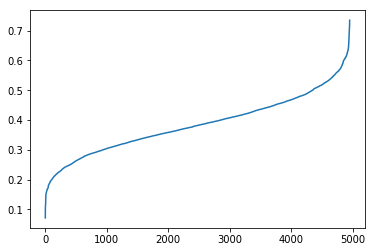

In [38]:
from matplotlib import pyplot as plt 

x=[k for k in range(len(distances))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, distances)

plt.show()

Let's try to set the cutoff as 0.2

In [39]:
cluster=defaultdict(bool)
setpoints=defaultdict(set)
for i in nodes.keys():
    cluster[i]=False
    setpoints[i]={i}
    
import random
A=random.sample(range(len(cluster)), (len(cluster)))


num_cluster=10
num_nodes=100
sz_cluster=num_nodes//num_cluster

# now make 9 random clusters from A, which has 100 elements. 

for i in range(num_cluster):
    for j in range(1,sz_cluster):
        setpoints[A[i*sz_cluster]].add(A[i*sz_cluster+j])
        del setpoints[A[i*sz_cluster+j]]

if num_nodes % num_cluster != 0:
    for z in range(num_cluster*sz_cluster, num_nodes):
        setpoints[A[(num_cluster-1)*sz_cluster]].add(A[z])
        del setpoints[A[z]]


    
# for i in nodes.keys():
#     for j in nodes.keys():
#         if(i!=j and j>i and cluster[i]==False and cluster[j]==False):
#             if(euclidean_distance(nodes[i], nodes[j])<0.3):
#                 setpoints[i].add(j)
#                 del setpoints[j]
#                 cluster[j]=True
#     cluster[i]=True

In [40]:
for key in setpoints.keys():
    print(key," -> ",setpoints[key])

37  ->  {0, 96, 3, 68, 37, 72, 8, 44, 58, 94}
39  ->  {67, 99, 39, 19, 23, 88, 91, 93, 30, 95}
40  ->  {33, 38, 40, 9, 11, 82, 22, 25, 59, 92}
49  ->  {65, 1, 4, 5, 41, 14, 46, 16, 49, 81}
54  ->  {6, 42, 74, 79, 51, 83, 54, 87, 61, 62}
71  ->  {2, 36, 71, 13, 78, 84, 21, 85, 28, 63}
73  ->  {64, 32, 26, 35, 73, 12, 24, 90, 27, 60}
75  ->  {98, 66, 69, 10, 75, 47, 17, 53, 55, 31}
76  ->  {34, 70, 7, 43, 76, 77, 15, 48, 52, 57}
86  ->  {97, 45, 80, 50, 18, 20, 86, 56, 89, 29}


In [41]:
print(len(setpoints))

10


So, we have i many nodes in place of 100. Now, we will first fix the incoming weights this i many nodes.

In [42]:
temp=[]
for node in setpoints.keys():
    row=torch.zeros(len(net.state_dict()["fc2.weight"][0]), dtype=torch.float)
    for val in setpoints[node]:
        row+=net.state_dict()["fc2.weight"][val]
    temp.append(row)
print(len(temp))

10


In [43]:
print(net.state_dict()["fc2.weight"].shape)
net.state_dict()["fc2.weight"].resize_((len(temp), len(temp[0])))
print(net.state_dict()["fc2.weight"].shape)

torch.Size([100, 33])
torch.Size([10, 33])


In [44]:
for i in range(len(temp)):
    for j in range(len(temp[0])):
        net.state_dict()["fc2.weight"][i][j]=temp[i][j]

In [45]:
print(net.state_dict()["fc2.weight"].shape)

torch.Size([10, 33])


In [46]:
temp=[]
for node in setpoints.keys():
    ele=0
    for val in setpoints[node]:
        ele+=net.state_dict()["fc2.bias"][val]
    temp.append(ele)
print(len(temp))

10


In [47]:
print(net.state_dict()["fc2.bias"].shape)
net.state_dict()["fc2.bias"].resize_((len(temp)))
print(net.state_dict()["fc2.bias"].shape)

torch.Size([100])
torch.Size([10])


In [48]:
for i in range(len(temp)):
    net.state_dict()["fc2.bias"][i]=temp[i]
print(net.state_dict()["fc2.bias"].shape)

torch.Size([10])


In [49]:
print(net.state_dict()["fc3.weight"].shape)
temp=[]
for i in range(len(net.state_dict()["fc3.weight"])):
    row=[]
    for j in setpoints.keys():
        ele=0
        for val in setpoints[j]:
            ele+=net.state_dict()["fc3.weight"][i][val]
        row.append(ele/len(setpoints[j]))
    temp.append(row)

torch.Size([10, 100])


In [50]:
print(len(temp), len(temp[0]))
# print(temp)

10 10


In [51]:
net.state_dict()["fc3.weight"].resize_(len(temp), len(temp[0]))
for i in range(len(temp)):
    for j in range(len(temp[0])):
        net.state_dict()["fc3.weight"][i][j]=temp[i][j]
print(net.state_dict()["fc3.weight"].shape)

torch.Size([10, 10])


In [52]:
print((net.state_dict()["fc3.bias"]).shape)

torch.Size([10])


In [53]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 9.650000 %


In [54]:
i=0
for parameter in net.parameters():
    i+=1
    if(i<5):
        parameter.requires_grad=False

In [55]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=200,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

In [56]:
i=0
for parameter in net.parameters():
    i+=1
    print(i," ",parameter.shape,"\n ",parameter,"\n\n")

1   torch.Size([6, 1, 5, 5]) 
  Parameter containing:
tensor([[[[-0.0192,  0.2511,  0.2183,  0.0210,  0.0190],
          [-0.0522,  0.3645,  0.3561,  0.5513,  0.3440],
          [ 0.0598,  0.5070,  0.6116,  0.6220,  0.2953],
          [ 0.2985,  0.1301,  0.4567,  0.1638,  0.2149],
          [-0.0246,  0.3206,  0.1249,  0.1288, -0.1632]]],


        [[[-0.1775, -0.0977,  0.0400,  0.2623,  0.2931],
          [ 0.0318, -0.1988, -0.1956,  0.1583,  0.1678],
          [-0.2439, -0.2983, -0.0792,  0.2235,  0.3461],
          [-0.0280, -0.2769, -0.1121,  0.0926,  0.3560],
          [-0.1970, -0.1645,  0.1938,  0.2115,  0.1824]]],


        [[[ 0.1362,  0.2118, -0.2154, -0.2076, -0.2334],
          [ 0.2467, -0.0821, -0.1670, -0.0738,  0.2066],
          [ 0.2564,  0.1952,  0.2048,  0.3864,  0.0963],
          [ 0.0786,  0.3546,  0.3418, -0.0168,  0.1037],
          [ 0.0178, -0.2039, -0.1759, -0.0146, -0.0048]]],


        [[[ 0.0299,  0.1694, -0.0029, -0.1827, -0.0718],
          [-0.1909, -0

In [57]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [58]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(inputs.shape)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print("[{}, {}] loss: {}".format
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Reraining')

[1, 20] loss: 0.02111035257577896
[1, 40] loss: 0.01765345734357834
[1, 60] loss: 0.01332759016752243
[1, 80] loss: 0.00910641872882843
[1, 100] loss: 0.006505764305591583
[1, 120] loss: 0.005376414209604263
[1, 140] loss: 0.004357194900512696
[1, 160] loss: 0.003873894229531288
[1, 180] loss: 0.00324937804043293
[1, 200] loss: 0.0032976980432868003
[1, 220] loss: 0.003017231874167919
[1, 240] loss: 0.002886640377342701
[1, 260] loss: 0.0027742383256554605
[1, 280] loss: 0.0028253718465566634
[1, 300] loss: 0.002437099814414978
[2, 20] loss: 0.002532775089144707
[2, 40] loss: 0.0024492948204278948
[2, 60] loss: 0.0024136525243520736
[2, 80] loss: 0.002091617837548256
[2, 100] loss: 0.0022038123682141305
[2, 120] loss: 0.0022178729102015496
[2, 140] loss: 0.00223090211302042
[2, 160] loss: 0.00219000069051981
[2, 180] loss: 0.0021972253397107124
[2, 200] loss: 0.0020923154205083846
[2, 220] loss: 0.0019175458401441575
[2, 240] loss: 0.001981714367866516
[2, 260] loss: 0.0020355234518647

[15, 280] loss: 0.0008656068667769432
[15, 300] loss: 0.0010516254231333732
[16, 20] loss: 0.0009148861858993769
[16, 40] loss: 0.0007764286641031504
[16, 60] loss: 0.0008616620618849993
[16, 80] loss: 0.0007786728534847498
[16, 100] loss: 0.0008143650777637959
[16, 120] loss: 0.0007886112052947283
[16, 140] loss: 0.0007674254085868597
[16, 160] loss: 0.0008323190528899432
[16, 180] loss: 0.0009015319459140301
[16, 200] loss: 0.0008308227434754372
[16, 220] loss: 0.0008444973174482584
[16, 240] loss: 0.0008768977168947458
[16, 260] loss: 0.000857983616180718
[16, 280] loss: 0.000892079801298678
[16, 300] loss: 0.000915202203206718
[17, 20] loss: 0.0007309652213007212
[17, 40] loss: 0.0008161892825737596
[17, 60] loss: 0.000768151767551899
[17, 80] loss: 0.0008909199079498648
[17, 100] loss: 0.0008758342564105987
[17, 120] loss: 0.0008210136871784926
[17, 140] loss: 0.0007864550286903977
[17, 160] loss: 0.0007867134958505631
[17, 180] loss: 0.000834137488156557
[17, 200] loss: 0.0008250

In [59]:
torch.save(net.state_dict(), "LeNET_x_y_MNIST_Model_random_clustering_Fine_Tuned")

In [60]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 4 * 4, len(net.state_dict()["fc1.weight"]))
        self.fc2 = nn.Linear(len(net.state_dict()["fc1.weight"]), len(net.state_dict()["fc2.weight"]))
        self.fc3 = nn.Linear(len(net.state_dict()["fc2.weight"]), 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
net.load_state_dict(torch.load("LeNET_x_y_MNIST_Model_random_clustering_Fine_Tuned"))

In [61]:
from torchsummary import summary
device=torch.device("cpu")
model=Net().to(device)
summary(model, input_size=(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                   [-1, 33]           8,481
            Linear-6                   [-1, 10]             340
            Linear-7                   [-1, 10]             110
Total params: 11,503
Trainable params: 11,503
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.04
Estimated Total Size (MB): 0.09
----------------------------------------------------------------


In [62]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 97.450000 %


Resources:
[https://towardsdatascience.com/how-to-cluster-in-high-dimensions-4ef693bacc6] [1/11/2019]